In [37]:
# Step 1: Install openpyxl, if not already installed, as it is required to read Excel files with Pandas
# pip install openpyxl

# Step 2: Import pandas
import pandas as pd

# Step 3: Load the specific sheet ('USDKHR') from the Excel file into a DataFrame
df = pd.read_excel('exchange-rate-data.xlsx', sheet_name='USDKHR')

# Step 4: Display the DataFrame to verify it's loaded correctly
print(df)

                    Date     Close
0    2003-12-01 23:58:00  3850.400
1    2003-12-02 23:58:00  3844.300
2    2003-12-03 23:58:00  3849.300
3    2003-12-04 23:58:00  3847.100
4    2003-12-05 23:58:00  3848.800
...                  ...       ...
6027 2023-12-27 23:58:00  4105.000
6028 2023-12-28 23:58:00  4112.660
6029 2023-12-29 23:58:00  4085.521
6030 2023-12-30 23:58:00  4092.985
6031 2023-12-31 23:58:00  4092.985

[6032 rows x 2 columns]


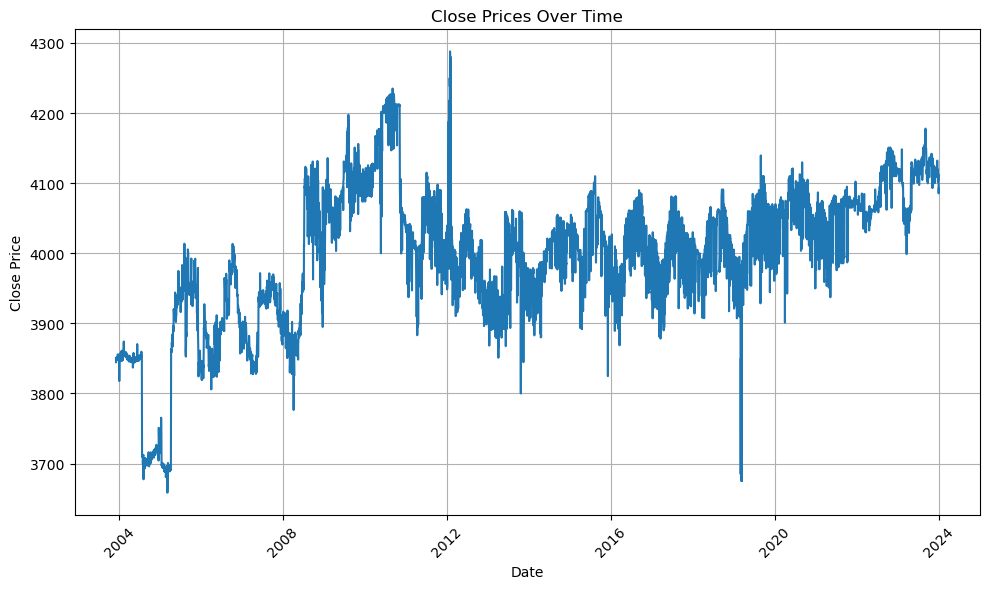

In [38]:
import matplotlib.pyplot as plt

# Plotting the DataFrame
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], linestyle='-')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

dfs_by_year = {}
for year in df['Year'].unique():
    dfs_by_year[year] = df[df['Year'] == year]

dfs_by_year

{2003:                   Date   Close  Year
 0  2003-12-01 23:58:00  3850.4  2003
 1  2003-12-02 23:58:00  3844.3  2003
 2  2003-12-03 23:58:00  3849.3  2003
 3  2003-12-04 23:58:00  3847.1  2003
 4  2003-12-05 23:58:00  3848.8  2003
 5  2003-12-08 23:58:00  3849.9  2003
 6  2003-12-09 23:58:00  3852.3  2003
 7  2003-12-10 23:58:00  3850.8  2003
 8  2003-12-11 23:58:00  3849.1  2003
 9  2003-12-12 23:58:00  3851.6  2003
 10 2003-12-15 23:58:00  3850.0  2003
 11 2003-12-16 23:58:00  3849.4  2003
 12 2003-12-17 23:58:00  3855.2  2003
 13 2003-12-18 23:58:00  3855.8  2003
 14 2003-12-19 23:58:00  3848.0  2003
 15 2003-12-22 23:58:00  3852.5  2003
 16 2003-12-23 23:58:00  3853.3  2003
 17 2003-12-29 23:58:00  3854.3  2003
 18 2003-12-30 23:58:00  3854.6  2003
 19 2003-12-31 23:58:00  3817.7  2003,
 2004:                    Date   Close  Year
 20  2004-01-02 23:58:00  3856.0  2004
 21  2004-01-05 23:58:00  3855.0  2004
 22  2004-01-06 23:58:00  3852.8  2004
 23  2004-01-07 23:58:00  3853.9 

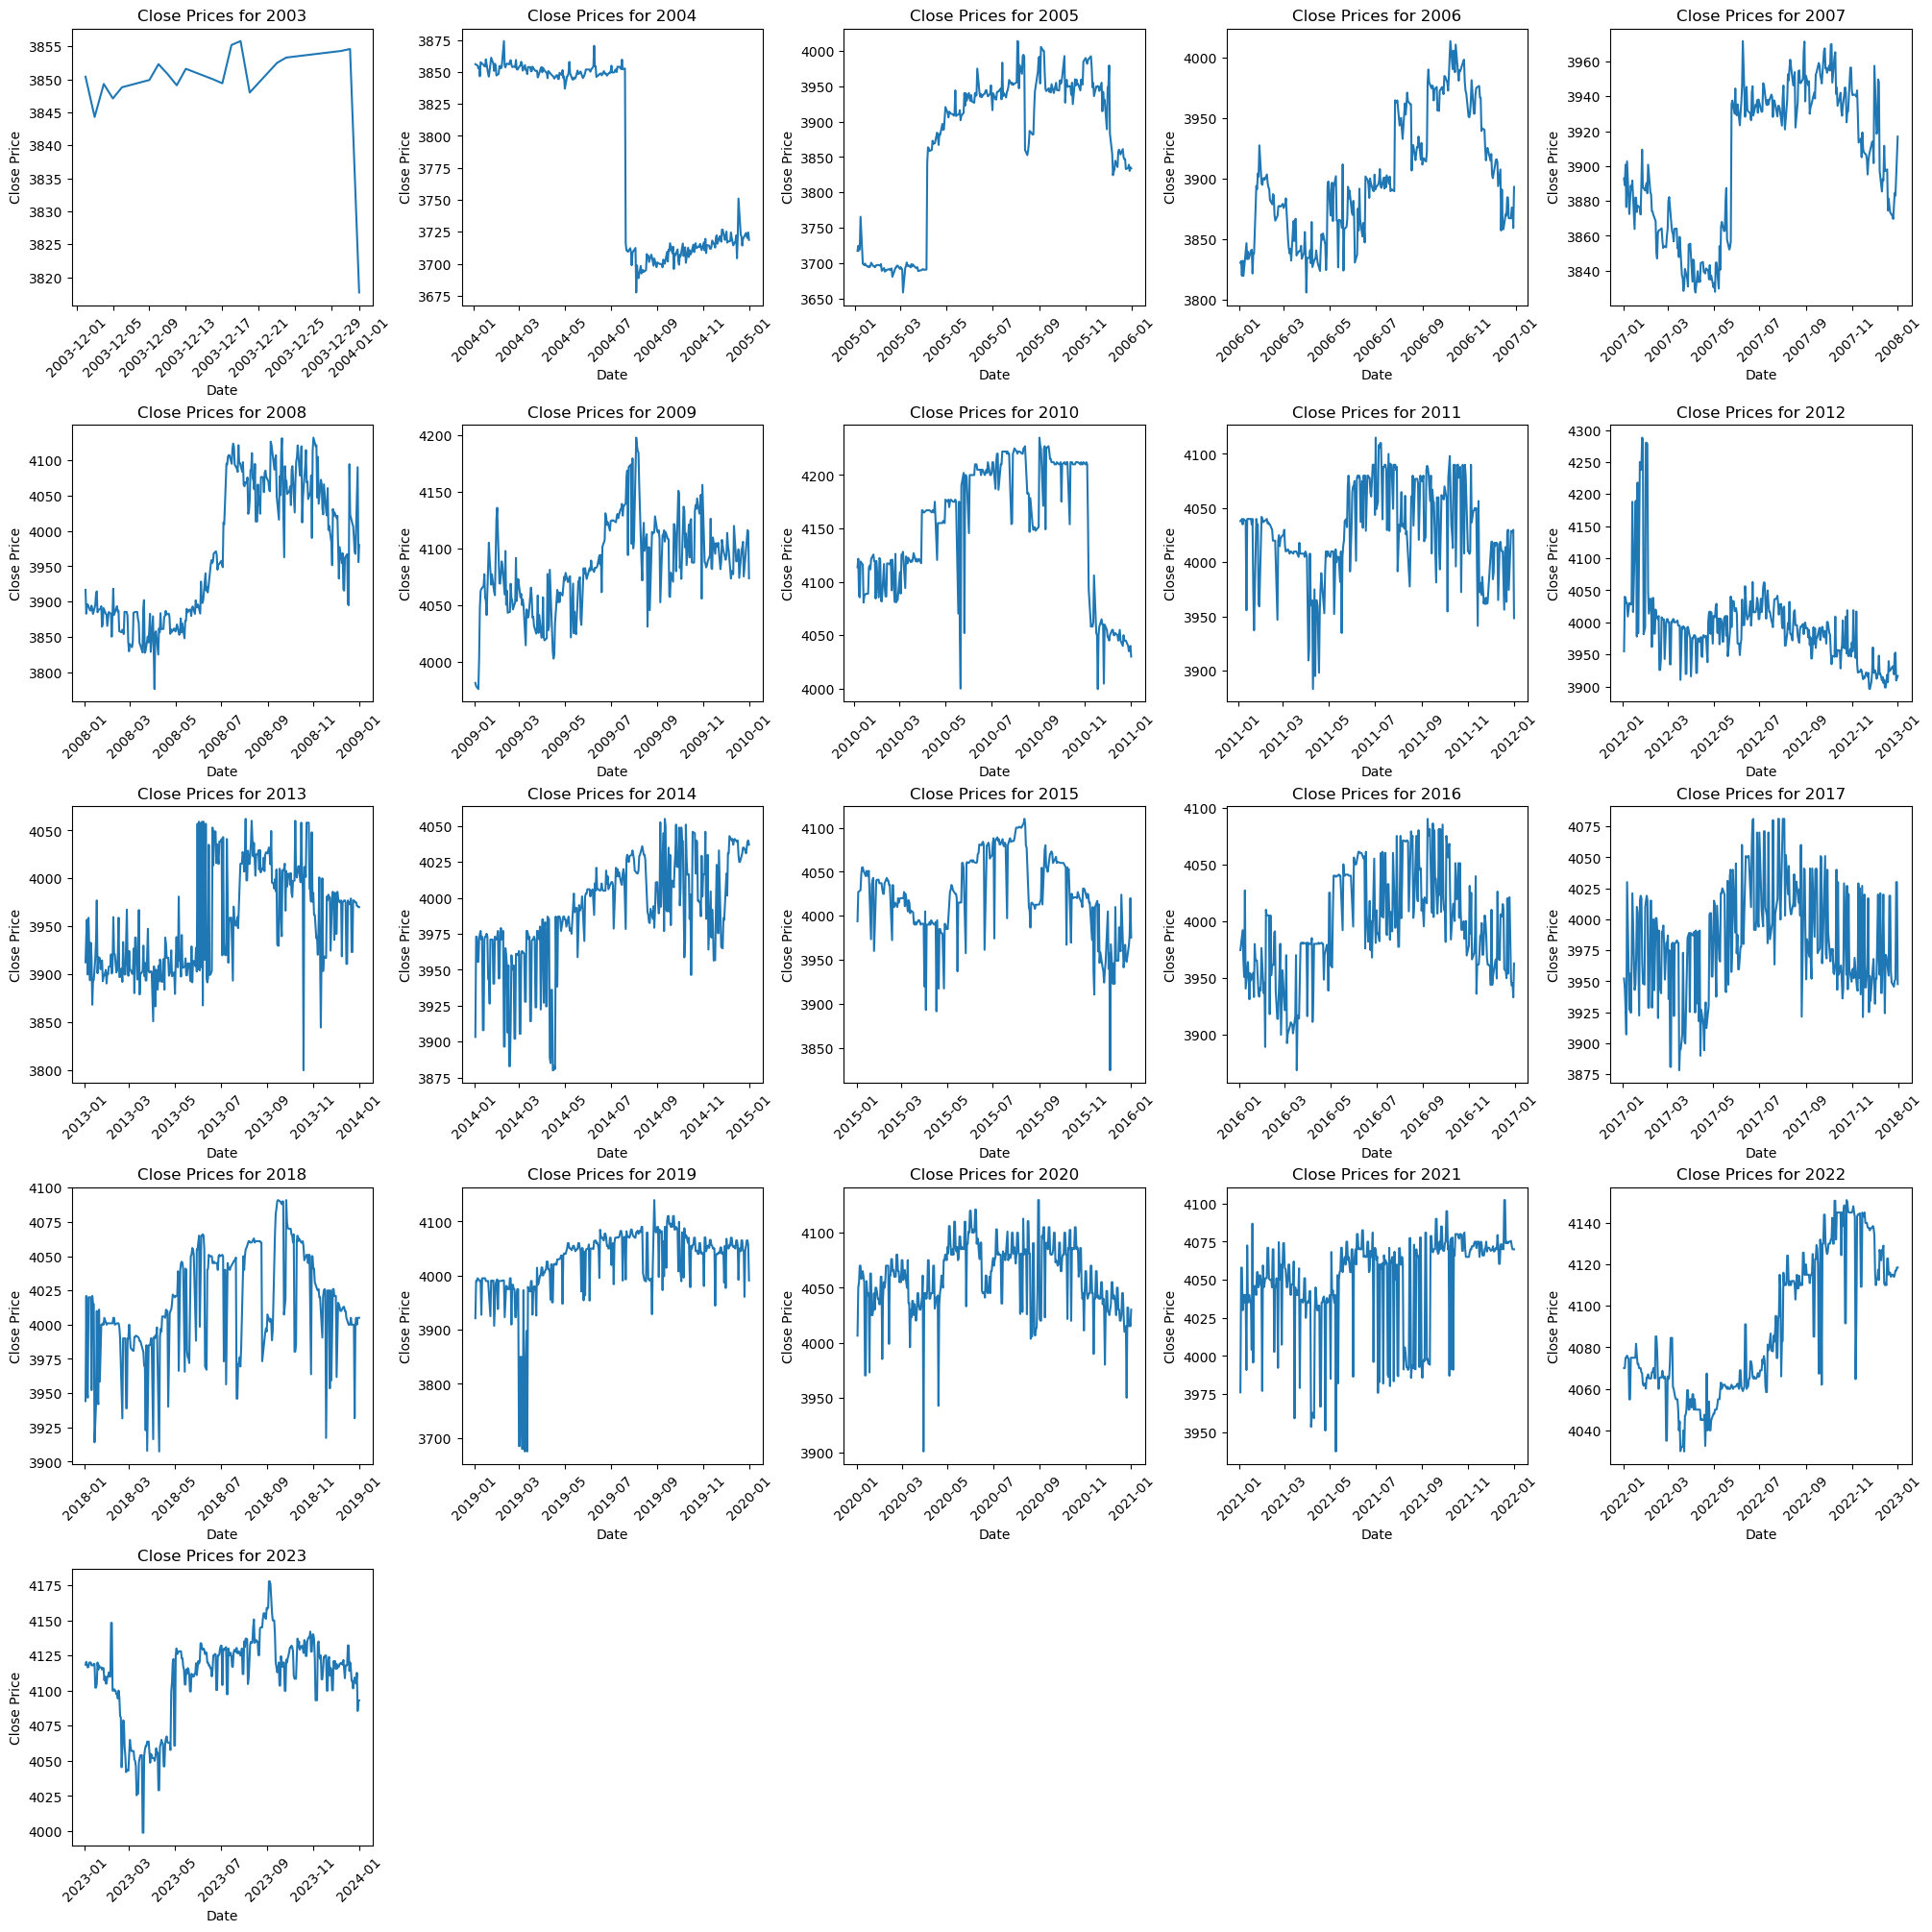

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dfs_by_year is a dictionary with years as keys and DataFrames as values
num_years = len(dfs_by_year)
# Calculate the number of rows needed
rows = np.ceil(num_years / 5).astype(int)
fig, axs = plt.subplots(rows, 5, figsize=(
    20, 4 * rows), constrained_layout=True)

# Flatten the axs array for easy iteration if there's more than one row
axs = axs.flatten()

for i, (year, df) in enumerate(dfs_by_year.items()):
    axs[i].plot(df['Date'], df['Close'], linestyle='-')
    axs[i].set_title(f'Close Prices for {year}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Close Price')
    axs[i].tick_params(axis='x', rotation=45)

# Hide any unused axes if the number of plots is not a perfect multiple of 5
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.show()

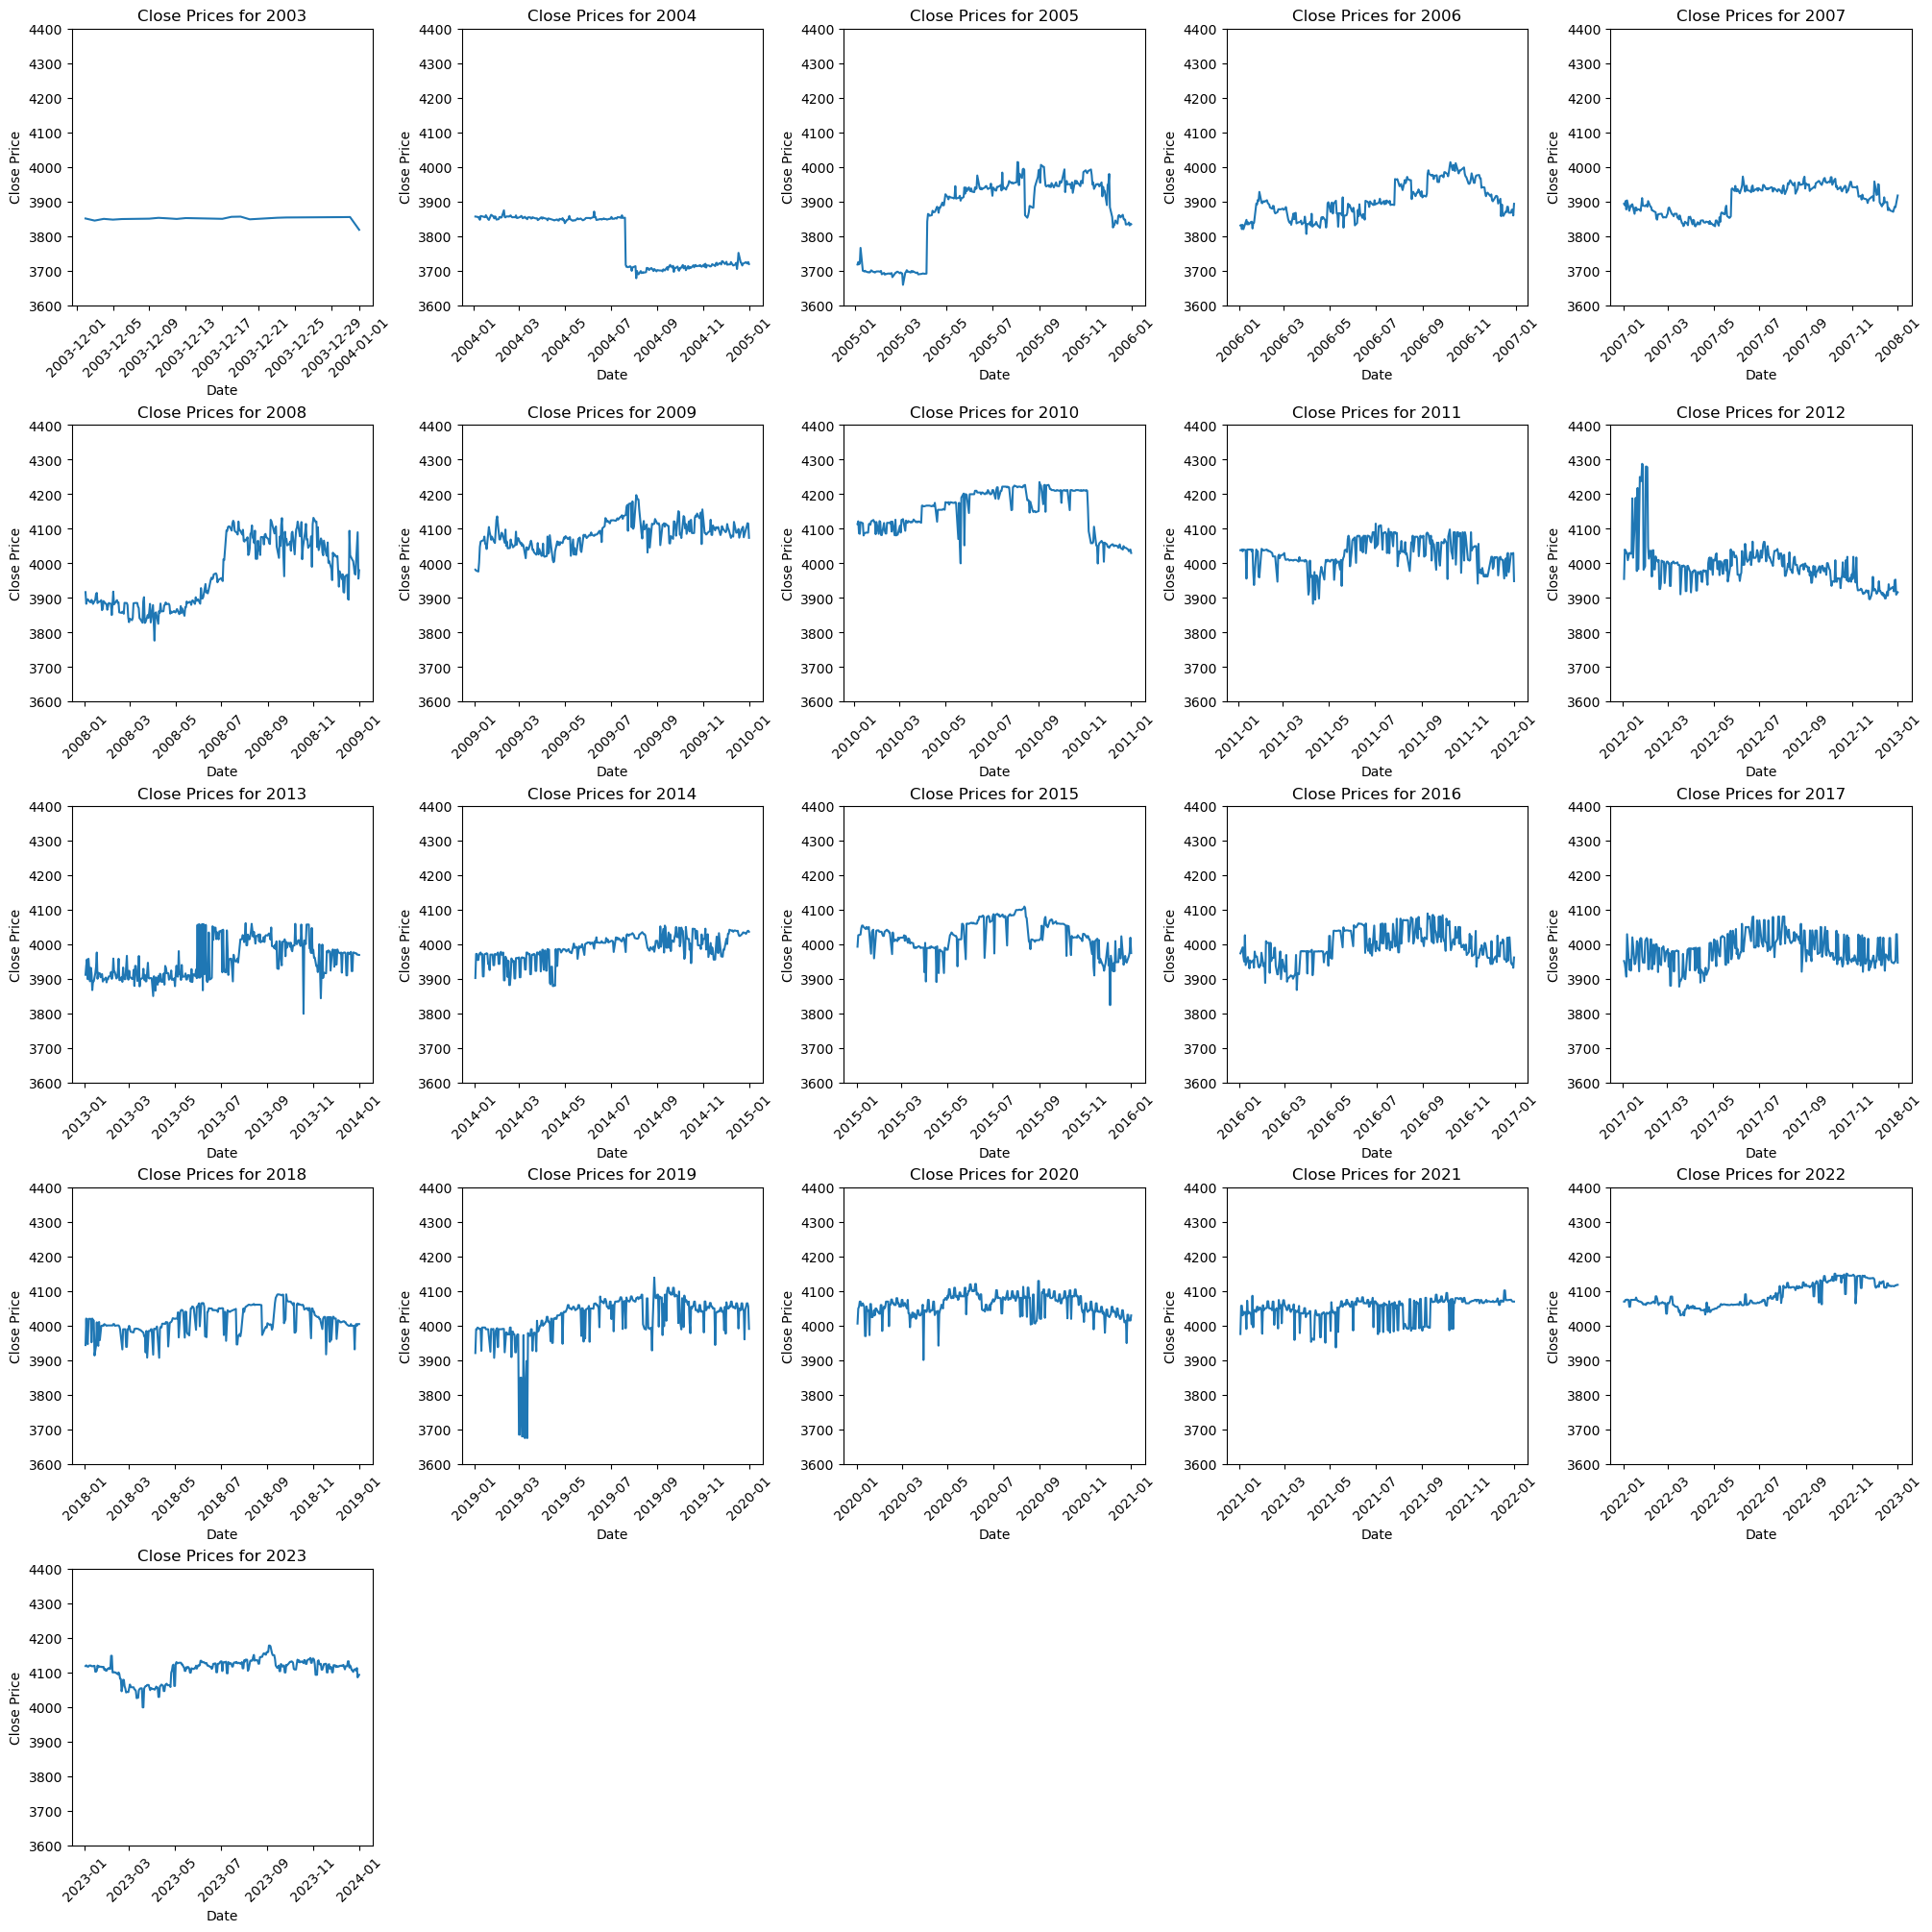

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dfs_by_year is a dictionary with years as keys and DataFrames as values
num_years = len(dfs_by_year)
# Calculate the number of rows needed
rows = np.ceil(num_years / 5).astype(int)
fig, axs = plt.subplots(rows, 5, figsize=(
    20, 4 * rows), constrained_layout=True)

# Flatten the axs array for easy iteration if there's more than one row
axs = axs.flatten()

for i, (year, df) in enumerate(dfs_by_year.items()):
    axs[i].plot(df['Date'], df['Close'])
    axs[i].set_title(f'Close Prices for {year}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Close Price')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylim(3600, 4400)  # Set static y-axis range

# Hide any unused axes if the number of plots is not a perfect multiple of 5
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.show()

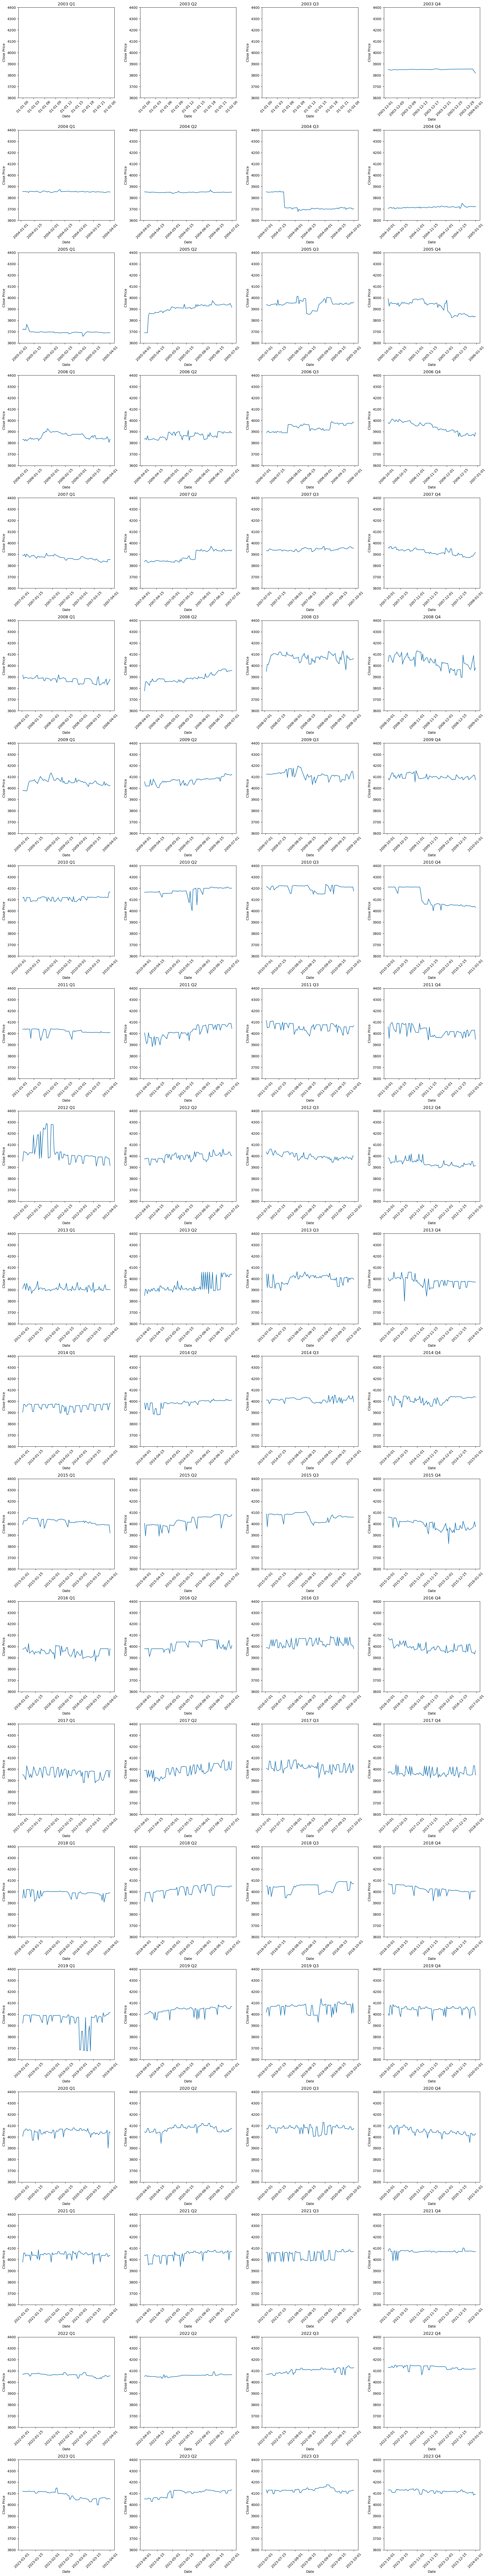

In [49]:
import matplotlib.pyplot as plt

# Assuming dfs_by_years is a dictionary with years as keys and DataFrames as values
years = sorted(dfs_by_year.keys())
num_years = len(years)

# Set up the subplot grid: 1 row per year, 4 columns for quarters
fig, axs = plt.subplots(nrows=num_years, ncols=4, figsize=(20, 5 * num_years))

for i, year in enumerate(years):
    # Assuming each DataFrame has a 'date' column to filter by quarters
    for q in range(4):
        # Calculate the month range for each quarter
        start_month = q * 3 + 1
        end_month = start_month + 2

        # Filter the DataFrame for the current quarter
        quarter_data = dfs_by_year[year][(dfs_by_year[year]['Date'].dt.month >= start_month) & (
            dfs_by_year[year]['Date'].dt.month <= end_month)]

        # Plot the quarter data in the respective subplot
        # Replace 'value' with the actual column name to plot
        axs[i, q].plot(quarter_data['Date'], quarter_data['Close'])
        axs[i, q].set_title(f'{year} Q{q+1}')

        axs[i, q].set_xlabel('Date')
        axs[i, q].set_ylabel('Close Price')
        axs[i, q].tick_params(axis='x', rotation=45)
        axs[i, q].set_ylim(3600, 4400)  # Set static y-axis range

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()